# Data filtering
Data filtering from behavior unabling acuity tests (following the stripes):
1. Rearing
2. Scratching
3. Moving around

In [1]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

dfPos = {}
dfOri = {}
df = {}

fnameClean = [
    'VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC_clean.h5',
    'VRAcuityExp_2017-07-13_15-05-16_VR-2B_NIC_clean.h5',
    'VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU_clean.h5',
    'VRAcuityExp_2017-07-13_15-38-34_VR-1A_NIC_clean.h5',
    'VRAcuityExp_2017-07-13_15-53-40_VR-1B_NIC_clean.h5',
    'VRAcuityExp_2017-07-13_16-11-46_VR-3A_NIC_clean.h5',
    'VRAcuityExp_2017-07-13_16-27-08_VR-3A_NIC_clean.h5',
    'VRAcuityExp_2017-07-13_17-09-07_VR-5A_NIC_clean.h5', ]

path = '../datasets/'
keyPass = 'Position'

def check_nan(DataFrame, key):
    for i, x in enumerate(DataFrame[key]):
        if math.isnan(x):
            print(i, x)

for i, x in enumerate(fnameClean):
    dfPos[i] = pd.read_hdf(path+fnameClean[i], 'Position')
    dfOri[i] = pd.read_hdf(path+fnameClean[i], 'Orientation')    
    
    #df[i] = pd.merge(df_pos[i], df_ori[i], on='Frame') # merge before or after filtering ## to be decided


## Rearing removal
Removal based on Y axis postion limit - low pass filter

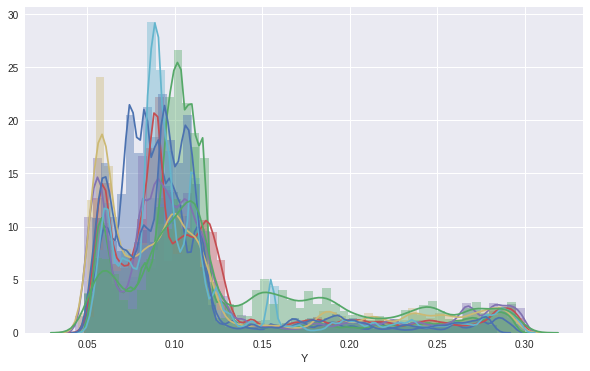

In [2]:
# data visutalization of all datasets before low pass filtering
fig = plt.figure(figsize=(10,6))
for i, x in enumerate(fnameClean):
    sns.distplot(dfPos[i].Y)

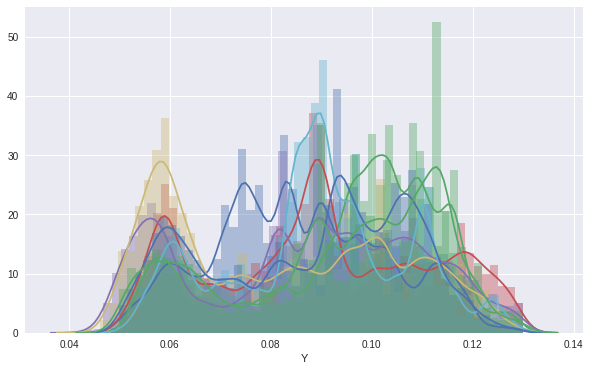

In [3]:
# removal of rearing positions
filter_limit = 0.13 ## to be decided

for i, x in enumerate(fnameClean):
    dfPos[i] = dfPos[i][dfPos[i]['Y'] < filter_limit]
    
# post filter vis
fig = plt.figure(figsize=(10,6))
for i, x in enumerate(fnameClean):
    sns.distplot(dfPos[i].Y)


## Scratching and cleaning removal
Removal based on Y axis orientation limit - band pass filter

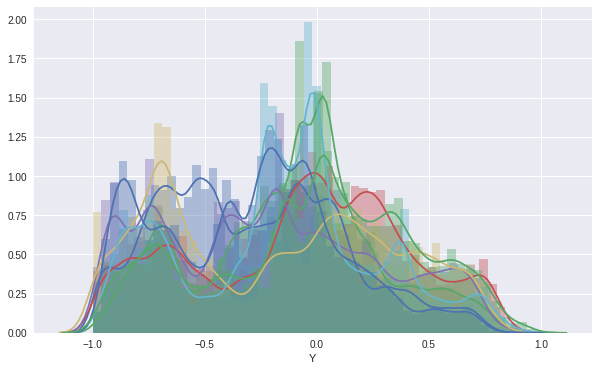

In [4]:
# data visutalization of all datasets before lband pass filtering
fig = plt.figure(figsize=(10,6))
for i, x in enumerate(fnameClean):
    sns.distplot(dfOri[i].Y)

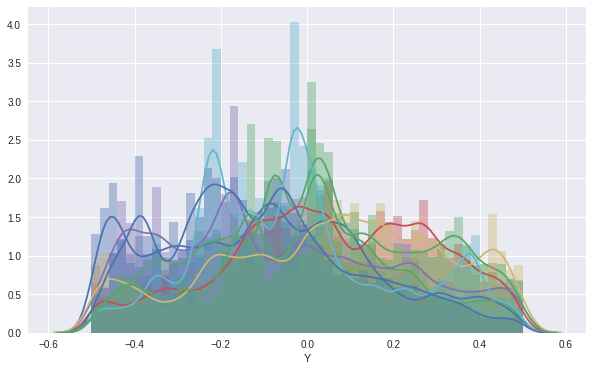

In [5]:
# removal of rearing positions
filter_limit = 0.5   ## to be decided

for i, x in enumerate(fnameClean):
    dfOri[i] = dfOri[i][dfOri[i]['Y'] < filter_limit]
    dfOri[i] = dfOri[i][dfOri[i]['Y'] >-filter_limit]
    
# post filter vis
fig = plt.figure(figsize=(10,6))
for i, x in enumerate(fnameClean):
    sns.distplot(dfOri[i].Y)

## Rapid movement removal
Removal based on speed of changes in the position(or/and orientation?) of the animal. 

To be decided: based on which/both data changes speed remove it

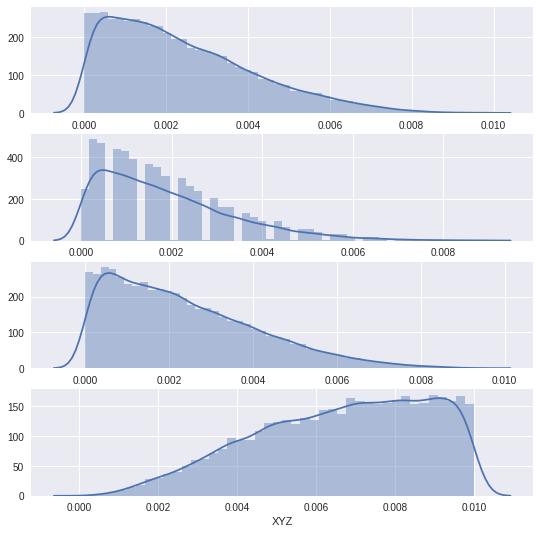

In [8]:
# extraction of speed of positon changes
dfDiff = dfPos[1].set_index('Frame').diff().dropna()
dfV    = dfPos[1].set_index('Frame').diff().dropna()

# calculating velocity in all axes
dfV['X'] = dfDiff.apply(lambda row: np.absolute(row.X) / row.Time, axis=1)
dfV['Y'] = dfDiff.apply(lambda row: np.absolute(row.Y) / row.Time, axis=1)
dfV['Z'] = dfDiff.apply(lambda row: np.absolute(row.Z) / row.Time, axis=1)
dfV['XYZ'] = dfV.apply(lambda row:row.X + row.Y + row.Z, axis=1)

filter_limit = 0.01
index = {'X', 'Y', 'Z', 'XYZ'}

for k in index:
    dfV = dfV[dfV[k] < filter_limit]

# velocity distribution in all axes
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sns.distplot(dfV.X, ax=ax1)
sns.distplot(dfV.Y, ax=ax2)
sns.distplot(dfV.Z, ax=ax3)
sns.distplot(dfV.XYZ, ax=ax4)

## Merging the datasets
Datasets merged - extraction of only good frames of experiments

In [7]:
## TODO: X_pos, X_ori indices

for i, x in enumerate(fnameClean):
    df[i] = pd.merge(dfPos[i], dfOri[i], on='Frame')
    